In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
ac = pd.read_csv('datasets\\accident_data.csv')

In [3]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [4]:
ac.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [5]:
ac['District Area'] = ac['District Area'].fillna(ac['District Area'].mode()[0])

In [6]:
ac['Longitude'] = ac['Longitude'].fillna(ac['Longitude'].mode()[0])

In [7]:
ac['Urban_or_Rural_Area'] = ac['Urban_or_Rural_Area'].fillna(ac['Urban_or_Rural_Area'].mode()[0])

In [8]:
ac['Latitude'] = ac['Latitude'].fillna(ac['Latitude'].mode()[0])

In [9]:
ac['Weather_Conditions'] = ac['Weather_Conditions'].fillna('unaccounted')

In [10]:
ac.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [11]:
ac['Accident_Severity'] = ac['Accident_Severity'].astype('category')

In [12]:
ac['Accident Date'] = pd.to_datetime(ac['Accident Date'], dayfirst = True, errors = 'coerce')

In [13]:
ac.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [14]:
ac['Number_of_Casualties'].value_counts()

Number_of_Casualties
1     504041
2     107971
3      30776
4      11156
5       4123
6       1525
7        539
8        214
9        112
10        58
11        36
13        24
12        21
14        13
15        11
17         8
19         7
16         7
18         6
22         5
21         4
29         3
40         2
28         2
24         2
27         2
42         2
25         1
32         1
68         1
45         1
62         1
47         1
48         1
26         1
43         1
Name: count, dtype: int64

In [15]:
ac['Accident Date'] = pd.to_datetime(ac['Accident Date'], errors='coerce')

In [16]:
ac['Year'] = ac['Accident Date'].dt.year

In [17]:
ac['Accident Date'] = pd.to_datetime(ac['Accident Date'], errors='coerce')

In [18]:
ac['Month'] = ac['Accident Date'].dt.month

<h1>Insight 1</h1>
<h2> Total accidents by severity </h2>

<function matplotlib.pyplot.show(close=None, block=None)>

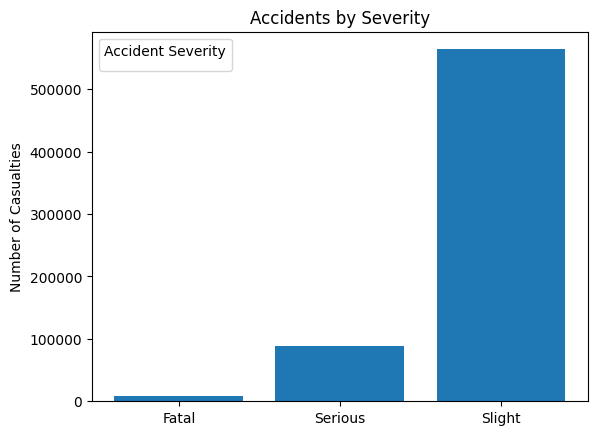

In [19]:
accidents_by_severity = ac.groupby([ 'Accident_Severity'])['Number_of_Casualties'].size().reset_index()

accidents_by_severity

plt.bar(accidents_by_severity['Accident_Severity'], accidents_by_severity['Number_of_Casualties'])
plt.title('Accidents by Severity')
plt.ylabel('Number of Casualties')
plt.legend(title='Accident Severity')
plt.show


<h1>Insight 2</h1>
<h2> Average casualties per year </h2>

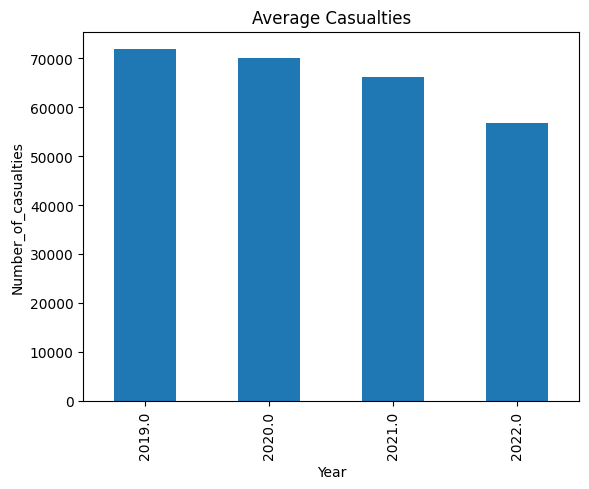

In [20]:
avg_casualties = ac.groupby('Year')['Number_of_Casualties'].mean().reset_index()
avg_casualties.unstack()
avg_casualties


avg_casualties = ac['Year'].value_counts().sort_index()


avg_casualties.plot(kind='bar')
plt.title('Average Casualties')
plt.xlabel('Year')
plt.ylabel('Number_of_casualties')
plt.show()

<h1>Insight 3</h1>
<h2> Number of accidents by vehicle type in year </h2>

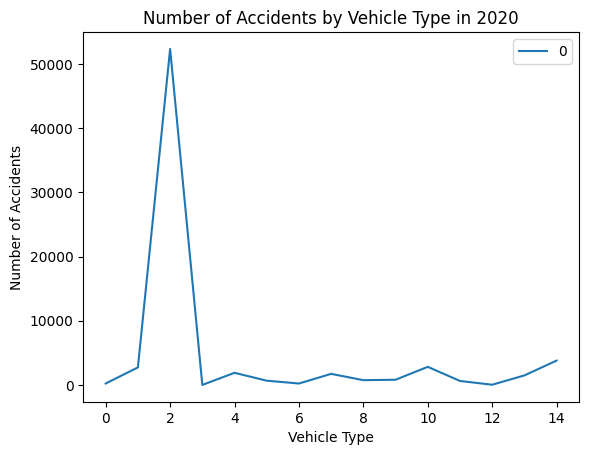

In [21]:
ac_2020 = ac[ac['Year'] == 2020]

accidents_by_vehicle_type = ac_2020.groupby('Vehicle_Type').size().reset_index()

accidents_by_vehicle_type.plot(kind='line')

plt.title('Number of Accidents by Vehicle Type in 2020')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.show()

<h1>Insight 4</h1>
<h2> Average number of casualties per vehicle type </h2>

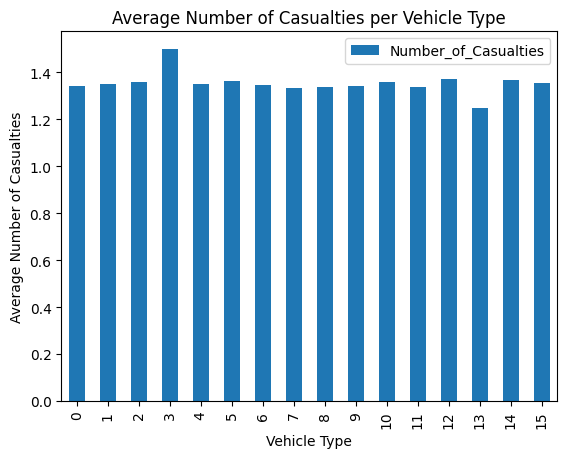

In [22]:
accidents_per_month = ac['Month'].value_counts().sort_index()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


avg_casualties_by_vehicle = ac.groupby('Vehicle_Type')['Number_of_Casualties'].mean().reset_index()

avg_casualties_by_vehicle.plot(kind='bar')


plt.title('Average Number of Casualties per Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Number of Casualties')
plt.show()

<h1>Insight 5</h1>
<h2> Road types with the most accidents </h2>

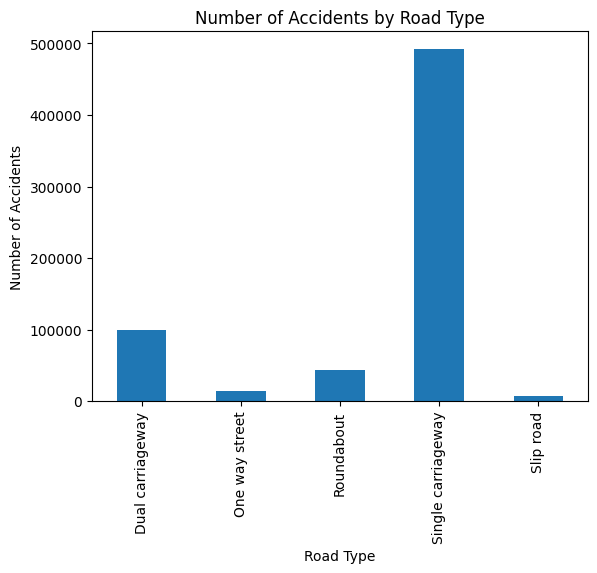

In [23]:
accidents_by_road_type = ac.groupby('Road_Type').size()

accidents_by_road_type.plot(kind='bar')

plt.title('Number of Accidents by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.show()

<h1>Insight 6</h1>
<h2> Urban vs rural accidents </h2>

<function matplotlib.pyplot.show(close=None, block=None)>

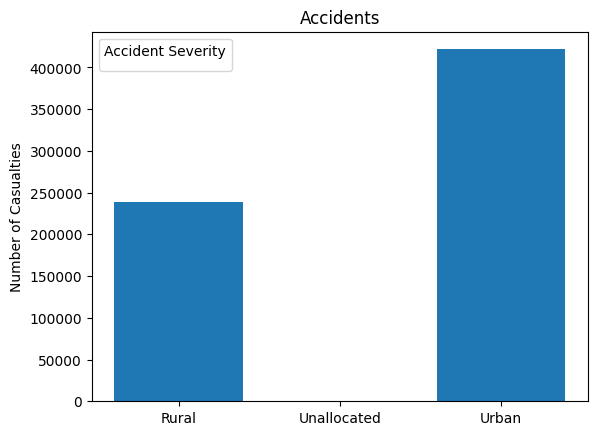

In [24]:
accidents_by_area = ac.groupby([ 'Urban_or_Rural_Area'])['Number_of_Casualties'].size().reset_index()

accidents_by_area

plt.bar(accidents_by_area['Urban_or_Rural_Area'], accidents_by_area['Number_of_Casualties'])
plt.title('Accidents')
plt.ylabel('Number of Casualties')
plt.legend(title='Accident Severity')
plt.show


<h1>Insight 7</h1>
<h2> How does the number of casualties vary between urban and rural areas during different months? </h2>

In [25]:
casualties_by_area_month = ac.groupby(['Urban_or_Rural_Area', 'Month'])['Number_of_Casualties'].mean().reset_index()
casualties_by_area_month

,Urban_or_Rural_Area,Month,Number_of_Casualties
0,Rural,1.0,1.449215
1,Rural,2.0,1.436782
2,Rural,3.0,1.439412
3,Rural,4.0,1.525697
4,Rural,5.0,1.480169
5,Rural,6.0,1.464091
6,Rural,7.0,1.461311
7,Rural,8.0,1.521781
8,Rural,9.0,1.469270
9,Rural,10.0,1.462834


<h1>Insight 8</h1>
<h2> Average number of vehicles involved in accidents per year </h2>

In [26]:
avg_vehicles_per_year = ac.groupby('Year')['Number_of_Vehicles'].mean()
avg_vehicles_per_year

Year
2019.0    1.837784
2020.0    1.827145
2021.0    1.823475
2022.0    1.832004
Name: Number_of_Vehicles, dtype: float64

<h1>Insight 9</h1>
<h2> Average casualties in different weather conditions </h2>

In [27]:
avg_casualties_weather = ac.groupby('Weather_Conditions')['Number_of_Casualties'].mean()
avg_casualties_weather

Weather_Conditions
Fine + high winds        1.386018
Fine no high winds       1.350480
Fog or mist              1.452948
Other                    1.354869
Raining + high winds     1.416641
Raining no high winds    1.408214
Snowing + high winds     1.418079
Snowing no high winds    1.341776
unaccounted              1.233720
Name: Number_of_Casualties, dtype: float64

<h1>Insight 10</h1>
<h2> Most common district area for accidents </h2>

In [28]:
most_common_area = ac['District Area'].mode()[0]
most_common_area

'Birmingham'

<h1>Insight 11</h1>
<h2> How does accident severity vary across different districts? </h2>

In [29]:
accidents_by_district = ac.groupby('District Area')['Accident_Severity'].value_counts()
accidents_by_district

District Area  Accident_Severity
Aberdeen City  Slight               1072
               Serious               239
               Fatal                  12
Aberdeenshire  Slight               1401
               Serious               463
                                    ... 
Wyre Forest    Serious               132
               Fatal                  22
York           Slight               1621
               Serious               255
               Fatal                  21
Name: count, Length: 1266, dtype: int64

<h1>Insight 12</h1>
<h2> How do weather conditions impact the number of vehicles involved in accidents? </h2>

In [30]:
avg_vehicles_by_weather = ac.groupby('Weather_Conditions')['Number_of_Vehicles'].mean()
avg_vehicles_by_weather

Weather_Conditions
Fine + high winds        1.779401
Fine no high winds       1.836809
Fog or mist              1.807823
Other                    1.777668
Raining + high winds     1.777951
Raining no high winds    1.831610
Snowing + high winds     1.737853
Snowing no high winds    1.754889
unaccounted              1.802661
Name: Number_of_Vehicles, dtype: float64

<h1>Insight 13</h1>
<h2>  Which vehicle types are most frequently involved in accidents? </h2>

In [31]:
accidents_by_vehicle_type_count = ac.groupby('Vehicle_Type').size().idxmax()
accidents_by_vehicle_type_count

'Car'

<h1>Insight 14</h1>
<h2> How do accident casualties change based on the number of vehicles involved? </h2>


In [32]:
avg_casualties_by_vehicle_count = ac.groupby('Number_of_Vehicles')['Number_of_Casualties'].mean()
avg_casualties_by_vehicle_count

Number_of_Vehicles
1      1.170932
2      1.374880
3      1.711169
4      1.995575
5      2.315341
6      2.612137
7      3.064189
8      3.401361
9      3.350877
10     3.629630
11     4.000000
12     2.285714
13     7.833333
14     5.444444
15     5.000000
16     6.000000
19    13.000000
28    16.000000
32     5.000000
Name: Number_of_Casualties, dtype: float64

<h1>Insight 15</h1>
<h2> What is the average number of casualties for each district area? </h2>

In [33]:
avg_casualties_by_district = ac.groupby('District Area')['Number_of_Casualties'].mean()
avg_casualties_by_district

District Area
Aberdeen City    1.139834
Aberdeenshire    1.310363
Adur             1.319871
Allerdale        1.474291
Alnwick          1.512931
                   ...   
Wychavon         1.427627
Wycombe          1.412377
Wyre             1.378029
Wyre Forest      1.382869
York             1.293094
Name: Number_of_Casualties, Length: 422, dtype: float64

In [34]:
The numbe of average is 1.3

SyntaxError: invalid syntax (1860908645.py, line 1)

<h1>Insight 16</h1>
<h2> What is the trend of accidents by month across multiple years? </h2>

In [ ]:
accidents_by_month_year = ac.groupby(['Year', 'Month']).size().unstack().sum()
accidents_by_month_year

<h1>Insight 17</h1>
<h2>  How many accidents involve more than one vehicle? </h2>

In [ ]:
accidents_multiple_vehicles = ac[ac['Number_of_Vehicles'] > 1].shape[0]
accidents_multiple_vehicles

<h1>Insight 18</h1>
<h2>  What is the relationship between weather conditions and accident severity? </h2>

In [ ]:
weather_severity_relation = ac.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack().sum()
weather_severity_relation

<h1>Insight 19</h1>
<h2> What is the average number of casualties for accidents involving motorcycles? </h2>

In [ ]:
avg_casualties_motorcycles = ac[ac['Vehicle_Type'] == 'Motorcycle']['Number_of_Casualties'].mean()
avg_casualties_motorcycles

<h1>Insight 20</h1>
<h2> Correlation between number of vehicles and number of casualties </h2>

In [ ]:
vehicle_casualty_corr = ac[['Number_of_Vehicles', 'Number_of_Casualties']].corr().iloc[0, 1]
vehicle_casualty_corr

<h1>Insight 21</h1>
<h2> What year is the highest number of casualties </h2>

In [ ]:
avg_casualties = ac.groupby('Year')['Number_of_Casualties'].sum()
avg_casualties

<h1>Insight 22</h1>
<h2> What year is the highest number of Accident </h2>

In [ ]:
avg_casualties = ac.groupby('Year')['Accident Date'].value_counts()
avg_casualties

<h1>Insight 23</h1>
<h2> What is the most common accident severity in urban vs rural areas? </h2>

In [43]:
most_comm_severity_area = ac.groupby("Urban_or_Rural_Area")["Accident_Severity"].agg(lambda x: x.mode()[0])
most_comm_severity_area

Urban_or_Rural_Area
Rural          Slight
Unallocated    Slight
Urban          Slight
Name: Accident_Severity, dtype: category
Categories (3, object): ['Fatal', 'Serious', 'Slight']

In [44]:
easy_df

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Year,,,,,,,,,,,,,,,,,,,,,
2019.0,134.0,201.0,75.0,115.0,52.0,146.0,120.0,120.0,129.0,158.0,...,162.0,273.0,92.0,109.0,132.0,135.0,170.0,127.0,97.0,194.0
2020.0,203.0,299.0,78.0,138.0,46.0,137.0,116.0,109.0,135.0,145.0,...,153.0,259.0,85.0,101.0,156.0,177.0,190.0,124.0,95.0,172.0
2021.0,204.0,257.0,66.0,111.0,9.0,129.0,94.0,110.0,152.0,139.0,...,125.0,255.0,92.0,111.0,126.0,138.0,171.0,130.0,96.0,215.0
2022.0,NaN,NaN,46.0,79.0,NaN,107.0,NaN,NaN,139.0,104.0,...,101.0,214.0,82.0,82.0,120.0,101.0,164.0,115.0,93.0,171.0


<h1>Line</h1>

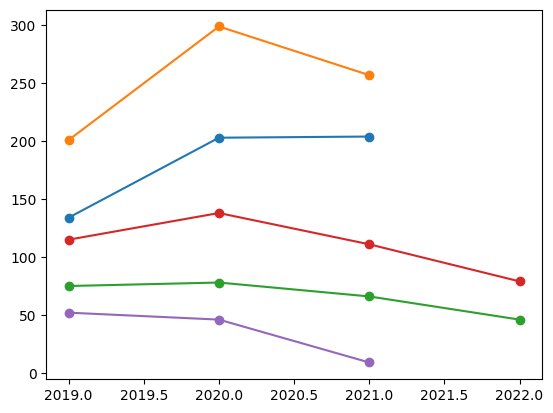

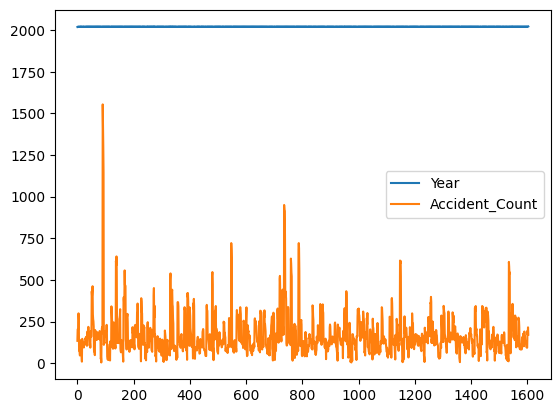

In [46]:
year_area = ac.groupby(['District Area' , 'Year']).size().reset_index(name = 'Accident_Count')

easy_df = year_area.pivot(index='Year', columns='District Area', values='Accident_Count')

plt.plot(easy_df.index, easy_df['Aberdeen City'], label='Aberdeen City', marker='o')
plt.plot(easy_df.index, easy_df['Aberdeenshire'], label='Aberdeenshire', marker='o')
plt.plot(easy_df.index, easy_df['Adur'], label='Adur', marker='o')
plt.plot(easy_df.index, easy_df['Allerdale'], label='Allerdale', marker='o')
plt.plot(easy_df.index, easy_df['Alnwick'], label='Alnwick', marker='o')

year_area.plot()
plt.show()

<h1>Correlation</h1>

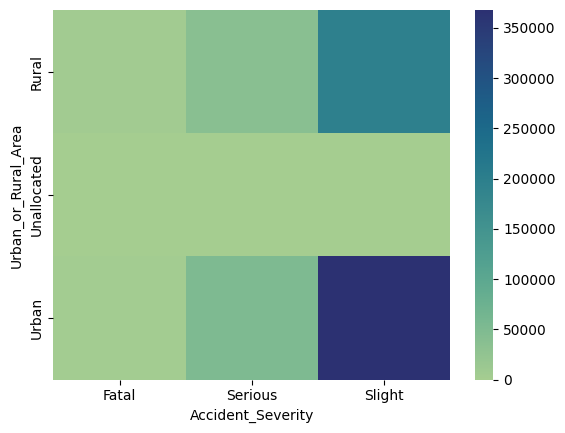

In [48]:
cas_veh = ac.groupby(['Urban_or_Rural_Area', 'Accident_Severity']).size().unstack()

sns.heatmap(cas_veh, cmap='crest')
plt.show()

In [56]:
cas_veh = ac.groupby(['Accident_Severity', 'Month'])['Number_of_Casualties'].mean().reset_index(name='average accident')

plt.scatter(cas_sev['Month'], cas_sev['average accident'])
plt.show()

NameError: name 'cas_sev' is not defined

<h1>Insight 1</h1>
<h2> Total accidents by severity </h2>